In [1]:
#This dataset contains accelerometer and gyroscope data associated when a person is running and walking. 

### Business Problem
 This dataset is used to identify whether a user is walking or running
 # Contents
 This data set contains 88588 user records and 8 coloumns, 44365 running  and 44223 walking record. In the dataset the coloumn named Activity is used to divide groups into walking  or running. 
 
# Domain Analysis
Acceleration (a) is the change in velocity (Δv) over the change in time (Δt), represented by the equation a = Δv/Δt. This allows you to measure how fast velocity changes in meters per second squared (m/s^2). Acceleration is also a vector quantity, so it includes both magnitude and direction
The X axis is parallel with the device's screen, aligned with the top and bottom edges, in the left-right direction. The Y axis is parallel with the device's screen, aligned with the left and right edges, in the top-bottom direction. The Z axis is perpendicular to the device's screen, pointing up.

 <img src="accelerometer.png">


 Time: when activity starts
 
 
 
 Username:Name of the user
 
 
 wrist:wrist" refers to the hand on which the device was worn while recording, it can take only two values i.e., 0 for "left" and 1 for "right"
 
 Activity:"activity" refers to the physical activity being performed during recording, 0 for "walk" and 1 for "run
 
A gyroscope measures the rate at which a device rotates around a spatial axis.Devices have a three-axis gyroscope, which delivers rotation values in each of the three axes shown in Rotation values are measured in radians per second around the given axis. Rotation values may be positive or negative depending on the direction of rotation.The gyroscope measures rotation around the x, y, and z axes.
 

In [3]:

# Import the data processing and visualization libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import f1_score
import math 

In [4]:
data=pd.read_csv('walkrun.csv')

In [5]:

# Access the first 5 rows 
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
#total number of rows and coloumns respectively
data.shape

(88588, 11)

In [4]:
#the data contains information about a user named Vicktor
data.username.unique()

array(['viktor'], dtype=object)

In [5]:
# Access the last 5 rows 

data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [9]:
#Target variable .There is no imbalance in data
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [10]:
#which hand the user has worn the sensor
data.wrist.unique()

array([0, 1])

In [11]:
data.username.value_counts()

viktor    88588
Name: username, dtype: int64

In [12]:
# Retrieve the colunmn information
data.columns.values

array(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype=object)

In [13]:
#gives the total number ,null value and the object type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [14]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


# Data cleaning

In [6]:

#Date and time are not needed
data.drop(columns=['date', 'time'],inplace=True)


In [7]:
#check for dulicate value
data = data.drop_duplicates()
print(data.shape)
#there are no duplicate values

(88588, 9)


In [8]:
data.isnull().sum()


username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [9]:
#function is used  to calculate acceleration from acceleration cordinates


accel =[]
def accleration(x,y,z):
    
    s=(x*x)+(y*y)+(z*z)
    acceleration=y=(math.sqrt(s)) 
    accel.append(acceleration)



In [10]:
#it goes throuh all the rows in the coloumn and get x,y,z acceleration cordinates
result = [accleration(x, y,z) for x, y ,z in zip(data['acceleration_x'], data['acceleration_y'],data['acceleration_z'])]


In [11]:
#create a new coloumn to store acceleration values
data["acceleration"]=""

In [13]:
#store values
data['acceleration']=pd.Series(accel)



In [14]:
data

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,acceleration
0,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...,...,...
88583,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


# Data Visualization

# Univariate analysis

wrist:#0 :left #1 :right more of the people wear the band on the right hand

acceleration_x:#most of the values are concentrated b/w -1 and 1


acceleration_y:#most of the values are concentrated b/w -1.5to 0 than it increases slowly and then decreases.

acceleration_z:values in increses from -2 to 0 and then suddenly dips to 1

gyro_x:most of the values are b/w -4 to 4

gyro_y:most of the values are b/w -4 to 4

gyro_z:most of the values are b/w -5 to 5



<AxesSubplot:xlabel='activity', ylabel='acceleration'>

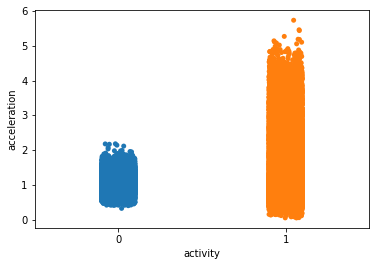

In [76]:
#plotting acceleration to activity we can find that the acceleration is high in  activity 1 and 
#we can determine activity 1 is running as the accleration is high.
#the maximum acceleration while walking is 2 and while running is 6  
sns.stripplot(x="activity", y="acceleration", data=data)


In [6]:
#which hand victor worn the sensor
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

Text(0.5, 0, 'count')

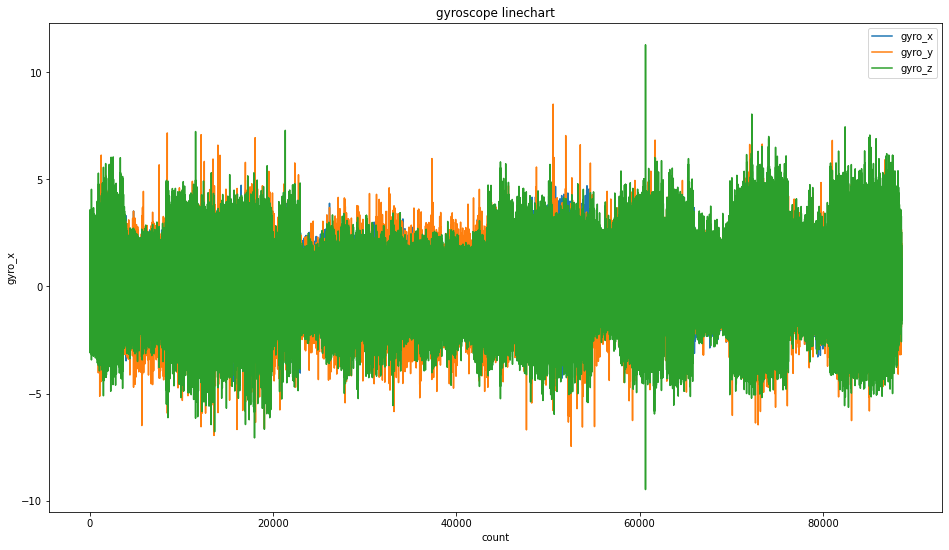

In [60]:
# Create a plot
my_figsize = (16, 9)
plt.figure(figsize=my_figsize)

plt.title('gyroscope linechart')
sns.lineplot(data=data['gyro_x'], label='gyro_x')
sns.lineplot(data=data['gyro_y'], label='gyro_y')
sns.lineplot(data=data['gyro_z'], label='gyro_z')
plt.xlabel("count")

#gyroscope values are all over the place.

Text(0.5, 0, 'count')

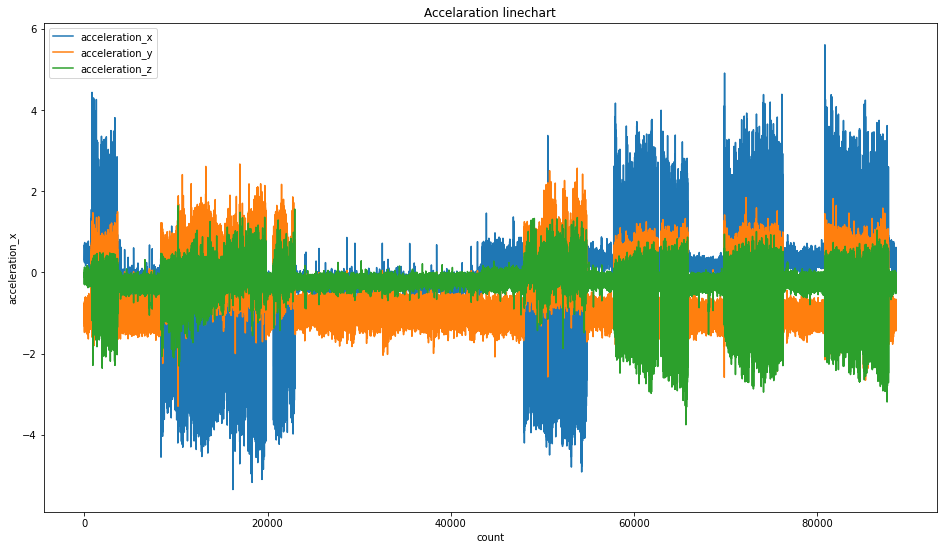

In [59]:
# Create a plot
my_figsize = (16, 9)
plt.figure(figsize=my_figsize)

plt.title('Accelaration linechart')
sns.lineplot(data=data['acceleration_x'], label='acceleration_x')
sns.lineplot(data=data['acceleration_y'], label='acceleration_y')
sns.lineplot(data=data['acceleration_z'], label='acceleration_z')
plt.xlabel("count")
#there is a high rate of change in x followed by  y and z.There is possibility that the spike 
#in data is  while running and while walking there is less spike.

In [20]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

<AxesSubplot:xlabel='wrist', ylabel='count'>

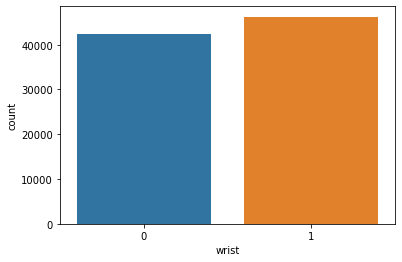

In [21]:
#0 :left
#1 :right
#most of the people wear the band on the right hand
sns.countplot(x='wrist', data=data)


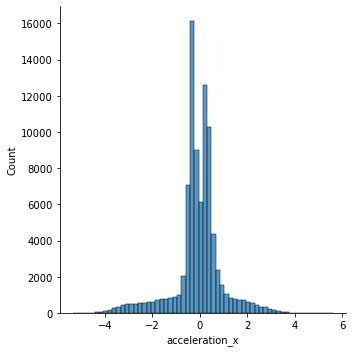

In [22]:
sns.displot(data['acceleration_x'],bins=60);
#most of the values are concentrated b/w -1 and 1


In [23]:
data.acceleration_x.describe()

count    88588.000000
mean        -0.074811
std          1.009299
min         -5.350500
25%         -0.381800
50%         -0.059500
75%          0.355500
max          5.603300
Name: acceleration_x, dtype: float64

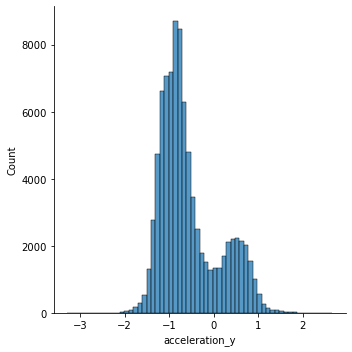

In [24]:
sns.displot(data['acceleration_y'],bins=60);
#most of the values are concentrated b/w -1.5to 0 than in increases slowly and then decreases.

In [25]:
data.acceleration_y.describe()

count    88588.000000
mean        -0.562585
std          0.658458
min         -3.299000
25%         -1.033500
50%         -0.759100
75%         -0.241775
max          2.668000
Name: acceleration_y, dtype: float64

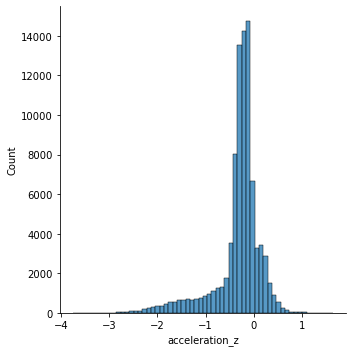

In [26]:
sns.displot(data['acceleration_z'],bins=60);
#values in increses from -2 to 0 and then suddenly dips to 1

In [27]:
data.acceleration_z.describe()

count    88588.000000
mean        -0.313956
std          0.486815
min         -3.753800
25%         -0.376000
50%         -0.221000
75%         -0.085900
max          1.640300
Name: acceleration_z, dtype: float64

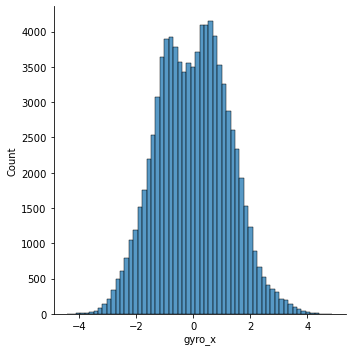

In [28]:
sns.displot(data['gyro_x'],bins=60);
#most of the values are b/w -4 to 4

In [29]:
data.gyro_x.describe()

count    88588.000000
mean         0.004160
std          1.253423
min         -4.430600
25%         -0.920700
50%          0.018700
75%          0.888800
max          4.874200
Name: gyro_x, dtype: float64

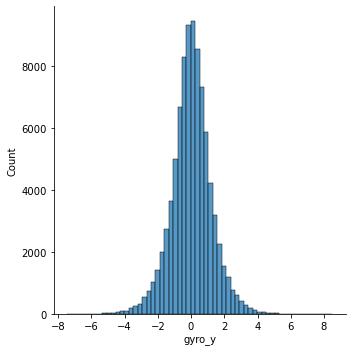

In [30]:
sns.displot(data['gyro_y'],bins=60);
#most of the values are b/w -4 to 4

In [31]:
data.gyro_y.describe()

count    88588.000000
mean         0.037203
std          1.198725
min         -7.464700
25%         -0.644825
50%          0.039300
75%          0.733700
max          8.498000
Name: gyro_y, dtype: float64

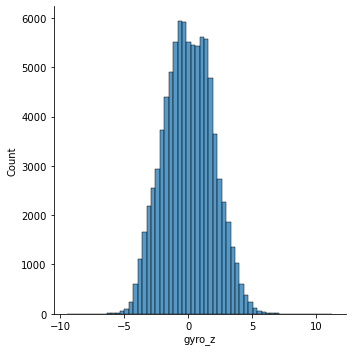

In [32]:
sns.displot(data['gyro_z'],bins=60);
#most of the values are b/w -5 to 5

In [33]:
data.gyro_z.describe()

count    88588.000000
mean         0.022327
std          1.914423
min         -9.480000
25%         -1.345125
50%          0.006900
75%          1.398200
max         11.266200
Name: gyro_z, dtype: float64

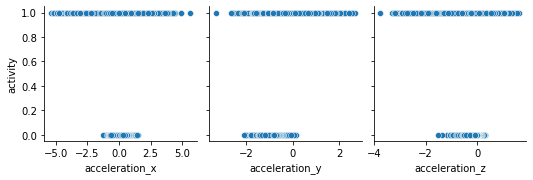

In [29]:
sns.pairplot(data=data,
                  y_vars=['activity'],
                  x_vars=['acceleration_x', 'acceleration_y', 'acceleration_z'])
#if you look at 3 plots we can find that 
#if x cordinate is more than +-1.5  then the user is running
#if y cordinate is less than -2.0  then the user is running or if >0 user
#if z cordinate is less than -1.7  then the user is running or if >.2(approx)

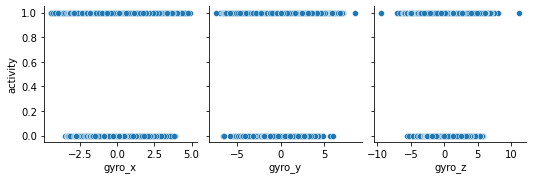

In [28]:
sns.pairplot(data=data,
                  y_vars=['activity'],
                  x_vars=['gyro_x', 'gyro_y', 'gyro_z'])
#if you look at 3 plots we can find that 
#compared to accelerometer values ,we cannot make such conclusions here..because there is 
#only a less difference b/w walking and running in x and y gyroscope values but in Z cordinate
#if the value is +-5 the user is running.

# Bivariate analysis

 acceleration x :when the acceleration x is -1 to 1,it implies the user is walking and if b/w -4 to 4 the user is running
 
acceleration y :if the acceleration is b/w -2 t 0,the user is walking and if b/w -2 to 2 the user is running

acceleration z :if the acceleration is b/w -1 to 0,user is walking and if b/w 3 to 1 user is running

note:there is no big no huge difference blw values in gyro compared to accelerometer

gyro x :if the gyro is b/w -3 t 3,the user is walking and if b/w -4 to 4 the user is running

gyro y :if the gyro is b/w -4 t 4,the user is walking and if b/w -6 to 6 the user is running

gyro z :if the gyro is b/w -5 t 5,the user is walking and if b/w -4.5 to 4.5 the user is running


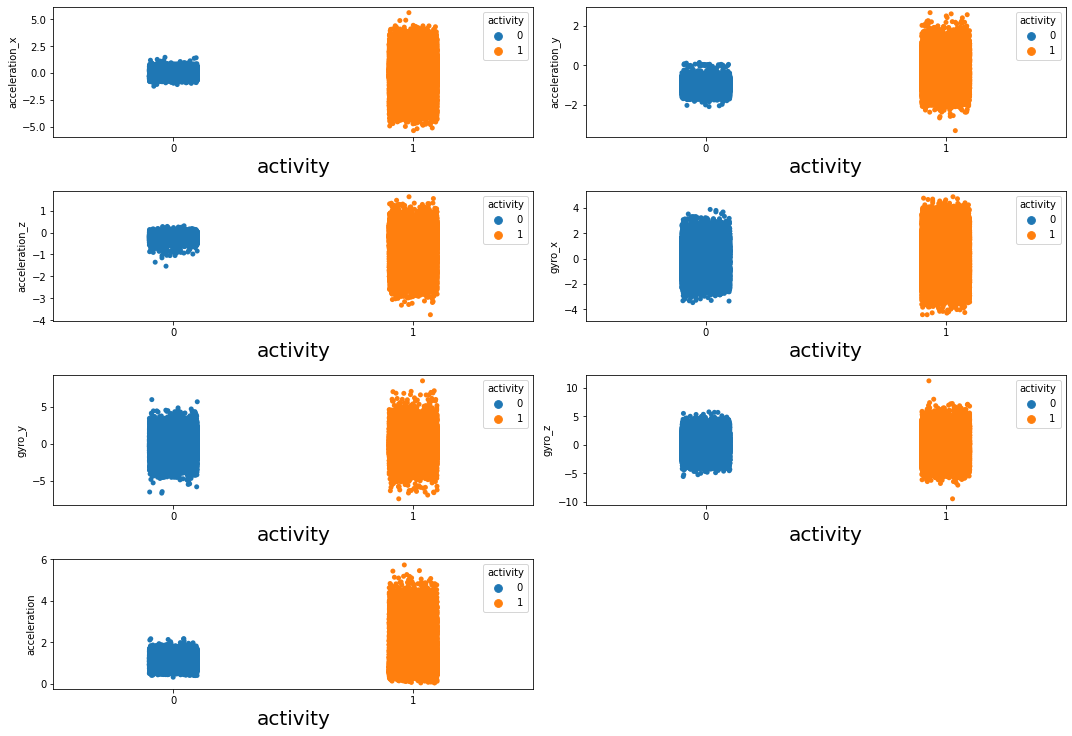

In [87]:
box=data[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','acceleration']]
plt.figure(figsize=(15,20), facecolor='white')

plotnumber = 1

for column in box:
    if plotnumber<=8 :     
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(x='activity', y=box[column], hue=data.activity, data=data)
        plt.xlabel("activity",fontsize=20)
        plt.tight_layout()
    plotnumber+=1
plt.show()


# Outlier Treatment 

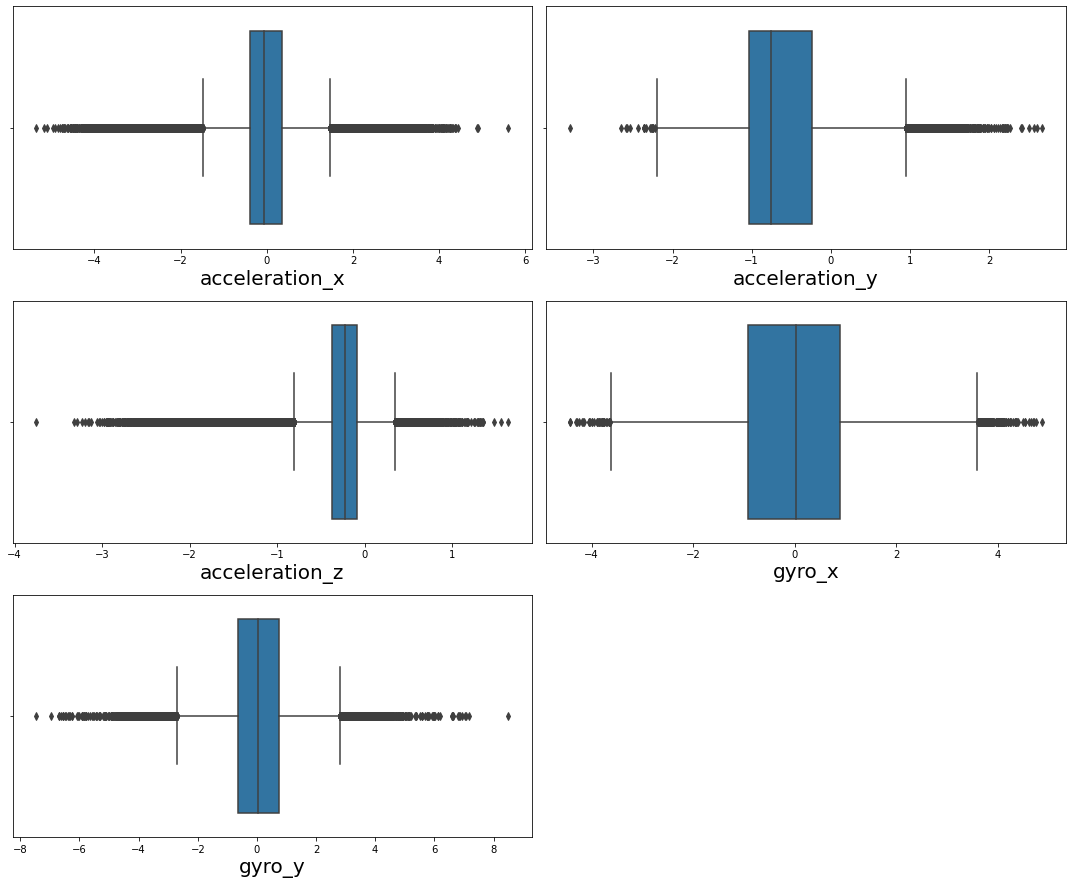

In [33]:
## Lets check outliers in any
# there are outliers in almost all t`ahe featurs.Certain models like Logistic regression models,
#are highly influenced by outliers.So it is better to treat the outlier before using this model,
#or use a different model where outlier treatment is not necessary eg.decision tree.

#in this case there are so many outliers ,in that case it should not be considered as outliers but valid data
box=data[['acceleration_x','acceleration_y','acceleration_z', 'gyro_x','gyro_y','gyro_z']]
plt.figure(figsize=(15,20), facecolor='white')

plotnumber = 1

for column in box:
    if plotnumber<=5 :     
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        plt.tight_layout()
    plotnumber+=1
plt.show()

 # Feature selection
Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model

<AxesSubplot:>

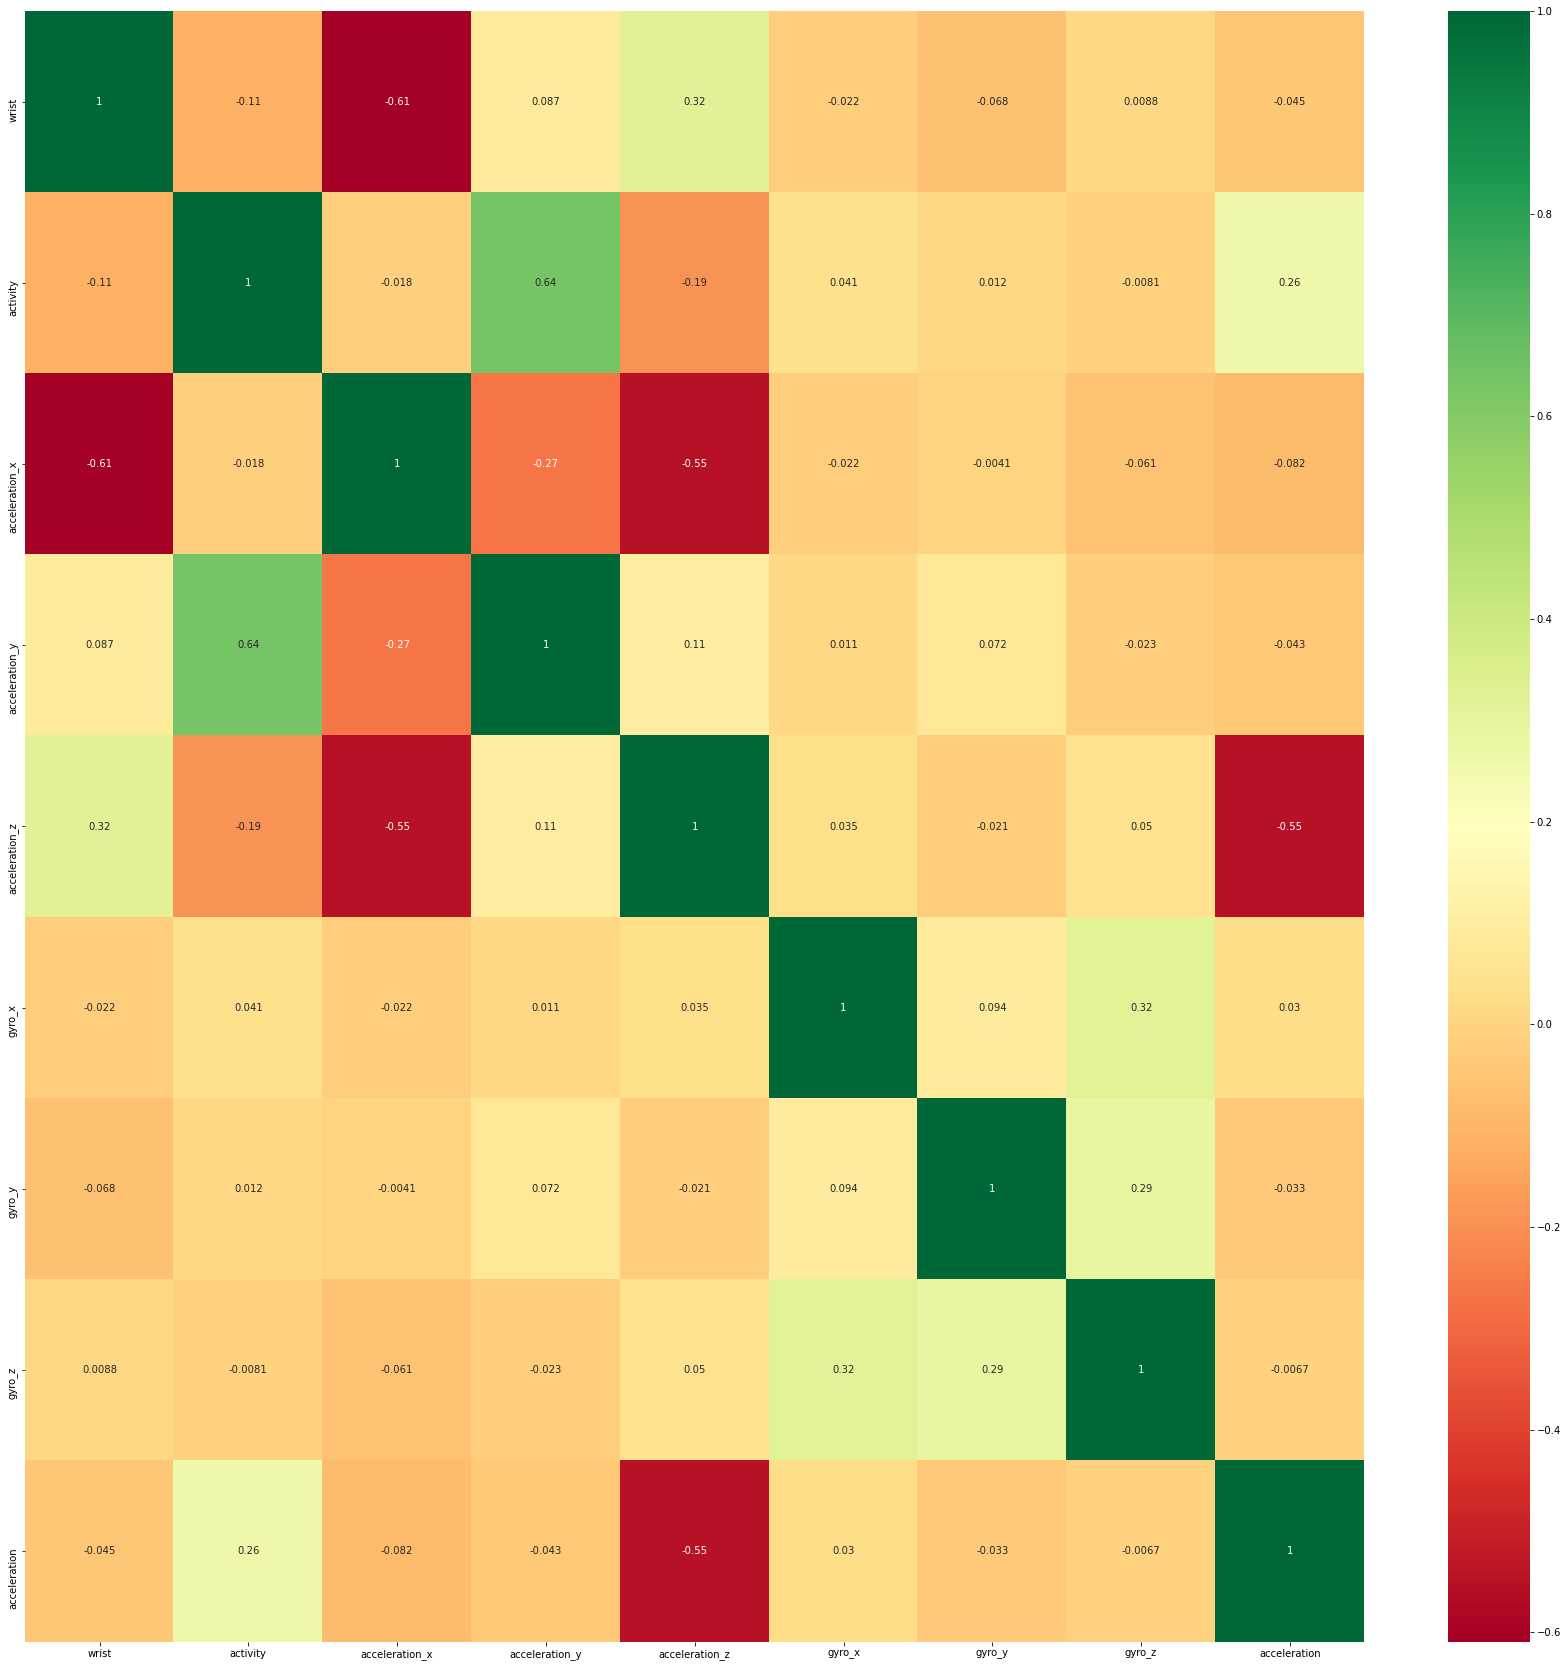

In [16]:
## Checking correlation

plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})
#there is no high correlation so,it is not wise to remove any features.


# Model Creation- logistic model


In [15]:
### model creation
X = data.drop(columns = ['activity','acceleration','username'])
y = data['activity']

In [16]:
## training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30,random_state=42)

In [17]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = log_reg.predict(X_test)

In [19]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8633404823719758


In [20]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.8998913679284699

In [99]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall


0.8156479587972431

In [21]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)
F1_Score

0.8557012316249504

In [101]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8630355840045734

In [22]:
pd.crosstab(y_test, y_pred)

col_0,0,1
activity,,
0,12176,1198
1,2434,10769


In [23]:
 from sklearn.metrics import classification_report

report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13374
           1       0.90      0.82      0.86     13203

    accuracy                           0.86     26577
   macro avg       0.87      0.86      0.86     26577
weighted avg       0.87      0.86      0.86     26577



In [104]:
fpr,tpr,threshold=roc_curve(y_test, y_pred)

In [105]:
print (threshold)

[2 1 0]


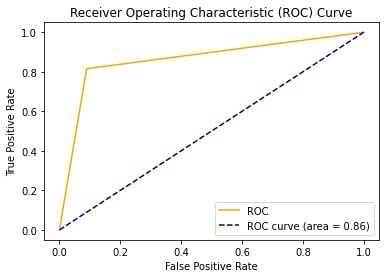

In [106]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

tpr  [0.         0.92259335 1.        ]
fpr  [0.         0.02729176 1.        ]
thresholds  [2 1 0]
roc_auc_score 0.9476507949323071
Threshold value is: 1


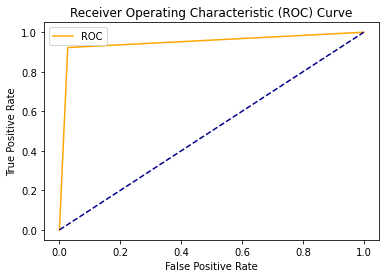

In [27]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("tpr ",tpr)
print("fpr ",fpr)
print("thresholds ",thresholds)
print("roc_auc_score" ,roc_auc_score(y_test, y_pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

# Improvement in  Logistic Regression with added feature acceleration

In [24]:
### model creation
X1 = data.drop(columns = ['activity','username'])
y = data['activity']

In [25]:
## training and testing data
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size = 0.30,random_state=42)

In [26]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = log_reg.predict(X_test)

In [28]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9478120179102231


In [130]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.9709070620117966

In [131]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall


0.922593349996213

In [132]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)
F1_Score

0.9461338304400172

In [133]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9476507949323071

In [134]:
pd.crosstab(y_test, y_pred)
#the accuracy has increased drstically but there is misclassification on running ,1022 values are showing 
#as running but is actually walking. This model will not be feasible

col_0,0,1
activity,,
0,13009,365
1,1022,12181


# Model 2 Decision Tree

In [29]:
# preparing training and testing data
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)

In [31]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
##Training score
y_train_predict=dt.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [32]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



In [33]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.9855962432835147

In [140]:
## test score
test_f1=f1_score(y_test,y_hat)
test_f1

0.9851397409679618

In [34]:
pd.crosstab(y_test,y_hat)

col_0,0,1
activity,,
0,10990,172
1,147,10838


# Hyperparameter  Tuning for  DecisionTree

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:


params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


In [37]:
 tree_cv.best_params_


{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [38]:
tree_cv.best_score_

0.985996272979218

In [41]:
#add the new best parameters
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=2,splitter='random')

In [42]:
 dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       splitter='random')

In [43]:
 y_hat1=dt1.predict(X_test)

In [44]:
 print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11162
           1       0.97      0.94      0.96     10985

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96      0.96     22147



# Model 3 RandomForest Implementation


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)


RandomForestClassifier()

In [46]:
y_predict=rf_clf.predict(X_test)

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11162
           1       0.99      0.99      0.99     10985

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [48]:
confusion_matrix(y_test,y_predict)

array([[11075,    87],
       [   80, 10905]])

In [49]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.9924011466533192

# Hyperparameter Tuning for random forest

In [50]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=50, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [51]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)
y_predict=rf_clf2.predict(X_test)
f1_score=f1_score(y_test,y_predict)

In [52]:
print (f1_score)

0.9924921508850162


In [53]:
## test acc
test_acc=accuracy_score(y_test,y_predict)
test_acc

0.9925497810087145

In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11162
           1       0.99      0.99      0.99     10985

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



# Artificial  Neural Network

In [51]:
### model creation
X = data.drop(columns = ['activity','date','username','time'])
y = data['activity']


In [52]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
sclaed_x=sc.fit_transform(X) ## transforming the data
X = pd.DataFrame(sclaed_x,columns=X.columns) ##converting the arrays

In [54]:
##creating training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.2,random_state=10)

In [55]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=.5,
                       max_iter=100,
                       random_state=2) ## model object creation
model.fit(X_train,y_train) ## training the data
y_predict_proba = model.predict_proba(X_test) ## predicting the pro
## bability of class
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [56]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.5001128827430507
Test accuracy : 0.5035557060616322


In [58]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8796
           1       0.50      1.00      0.67      8922

    accuracy                           0.50     17718
   macro avg       0.25      0.50      0.33     17718
weighted avg       0.25      0.50      0.34     17718



/Users/vishnupt/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishnupt/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishnupt/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving the best Model

In [55]:
import joblib
joblib.dump(rf_clf2, 'walkrun_Random.pkl') # pickle


['walkrun_Random.pkl']

# Conclusion

After creating all the models we found out the Random forest with hyperparameter model is the best model with F1 socre of 99.25.All other model have comparitively less F1 score.